# **DATA SCIENCE AND BUSINESS ANALYTICS**
**THE SPARKS FOUNDATION**


# **TASK 3 : Exploratory Data Analysis - Retail (Level - Beginner)** 
**Performing EDA on Sample Superstore**<br>
**Dataset : https://bit.ly/3i4rbWl**


# **#GRIPOCTOBER21**

**AUTHOR : SHRIKRUSHNAKUMAR BHAUSAHEB SONDGE**

**Let's import all the required libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
plt.style.use('seaborn-darkgrid')

**Importing the dataset**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [4]:
df = pd.read_csv('SampleSuperstore.csv')

**To print a summary of the Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Checking with number of rows and columns in dataset**

In [6]:
df.shape

(9994, 13)

**Checking for duplicate entries**

In [7]:
df.duplicated().sum()

17

**To drop the duplicate entries**

In [8]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [9]:
#Checking for Null Values.
print(df.isnull().sum())
print(f"\n\n\n{'0'} indicates that there is not any null value in dataset.")

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64



0 indicates that there is not any null value in dataset.


# **Data Visualization**
**Based on category, segment, ship mode and region**

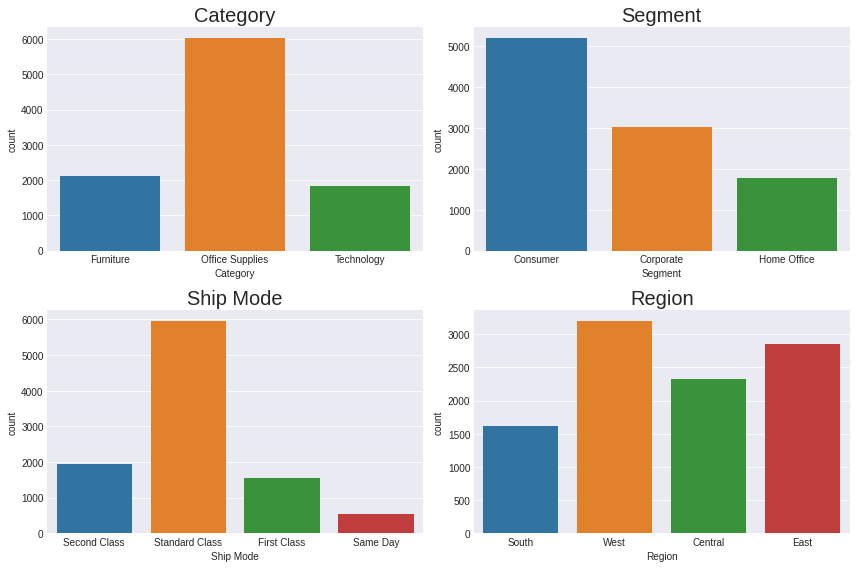

In [10]:
fig,axs = plt.subplots(nrows = 2,ncols = 2,figsize = (12,8));
sns.countplot(df['Category'], ax = axs[0][0])
sns.countplot(df['Segment'], ax = axs[0][1])
sns.countplot(df['Ship Mode'], ax = axs[1][0])
sns.countplot(df['Region'], ax = axs[1][1])
axs[0][0].set_title('Category', fontsize = 20)
axs[0][1].set_title('Segment', fontsize = 20)
axs[1][0].set_title('Ship Mode', fontsize = 20)
axs[1][1].set_title('Region', fontsize = 20)
plt.tight_layout()

**Based on sub-category**

Text(0.5, 1.0, 'Sub-Category')

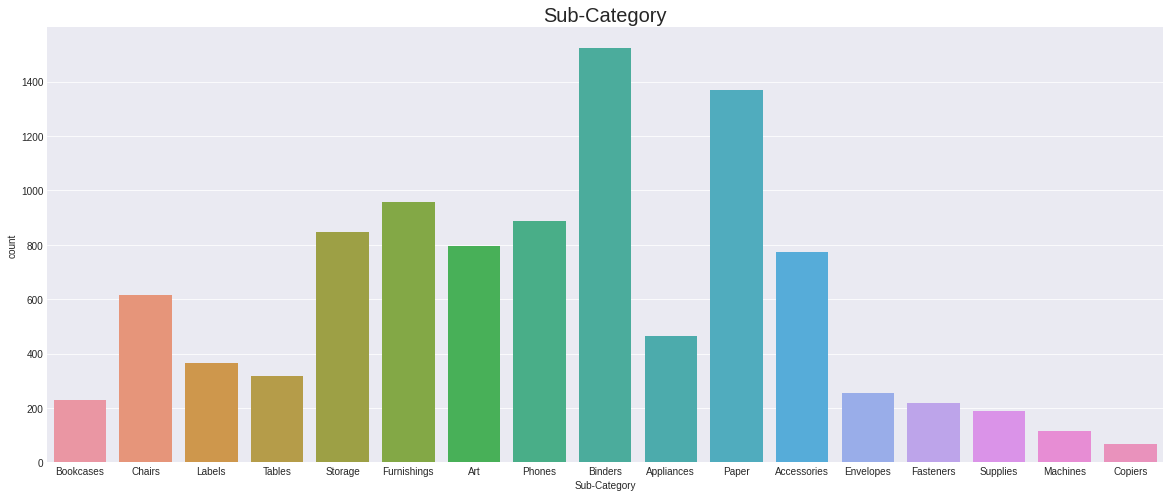

In [11]:
plt.figure(figsize = (20,8))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category', fontsize = 20)

**Based on quantity**

Text(0.5, 1.0, 'Quantity')

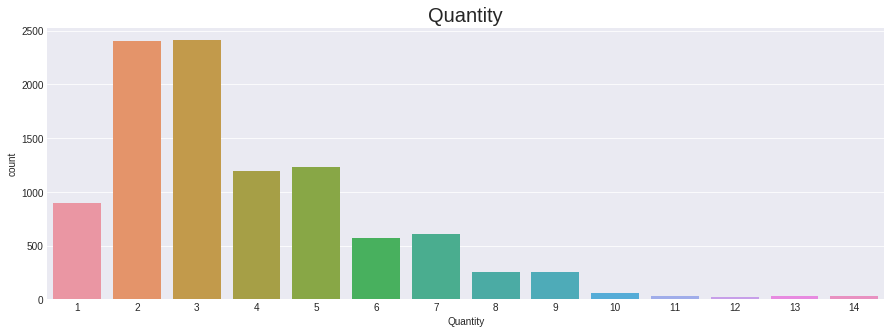

In [12]:
plt.figure(figsize = (15,5))
sns.countplot(df['Quantity'])
plt.title('Quantity', fontsize = 20)

**Based on discount**

Text(0.5, 1.0, 'Discount')

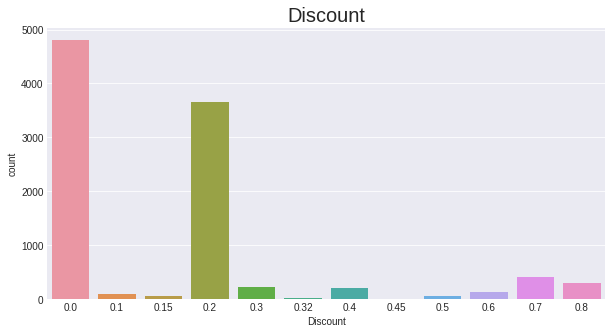

In [13]:
plt.figure(figsize = (10,5))
sns.countplot(df['Discount'])
plt.title('Discount', fontsize = 20)

**To find correlation of dataset**

In [14]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


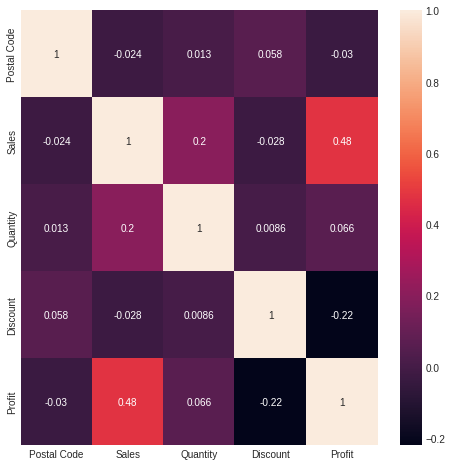

In [15]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr() , annot = True)

From the above heatmap, we can say that sales and profit are moderately correlated. Discount and profit are negatively correlated. Quantity and profit are less moderately correlated

# **Distribution of Data**


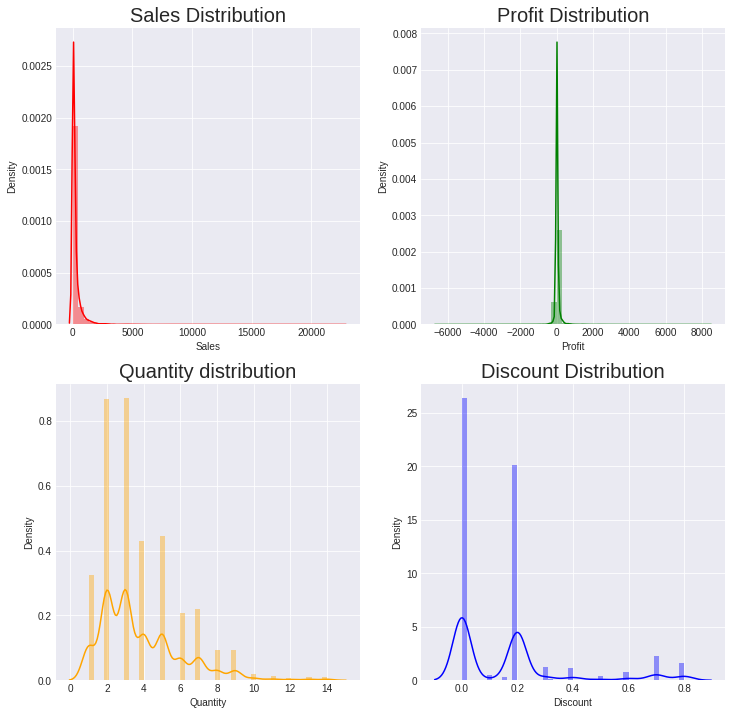

In [16]:
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (12,12))
sns.distplot(df['Sales'], color = 'red',  ax = axs[0][0])
sns.distplot(df['Profit'], color = 'green',  ax = axs[0][1])
sns.distplot(df['Quantity'], color = 'orange',  ax = axs[1][0])
sns.distplot(df['Discount'], color = 'blue',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 20)
axs[0][1].set_title('Profit Distribution', fontsize = 20)
axs[1][0].set_title('Quantity distribution', fontsize = 20)
axs[1][1].set_title('Discount Distribution', fontsize = 20)
plt.show()

From above distribution graph we can definitely say, sales distribution is rightly skewed and profit distribution is normally skewed

# **State wise analysis**
**Based on dealings**

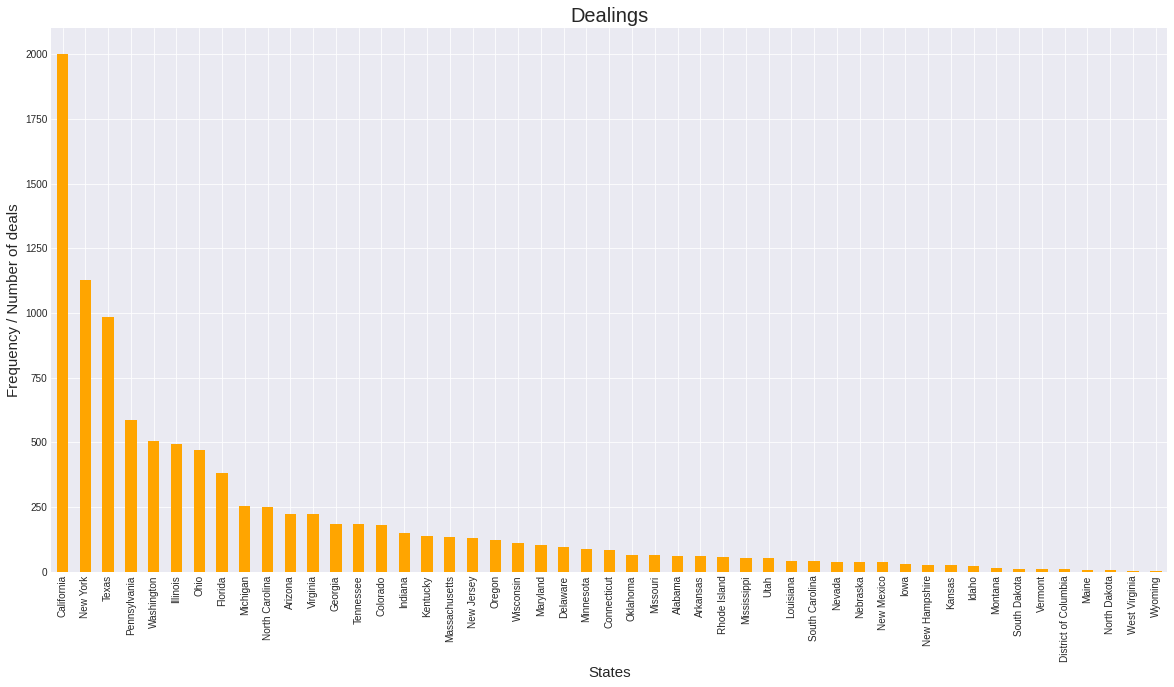

In [17]:
df1 = df['State'].value_counts()
df1.plot(kind = 'bar', figsize = (20,10), color = 'orange')
plt.ylabel('Frequency / Number of deals' , size = 15)
plt.xlabel('States' , size = 15)
plt.xticks(rotation = 90)
plt.title('Dealings', fontsize = 20)
plt.show()

From this graph, we can conclude that California has the highest number of deals. States named Maine, North Dakota and West Virginia have little to no less number of deals.

**Based on profit**

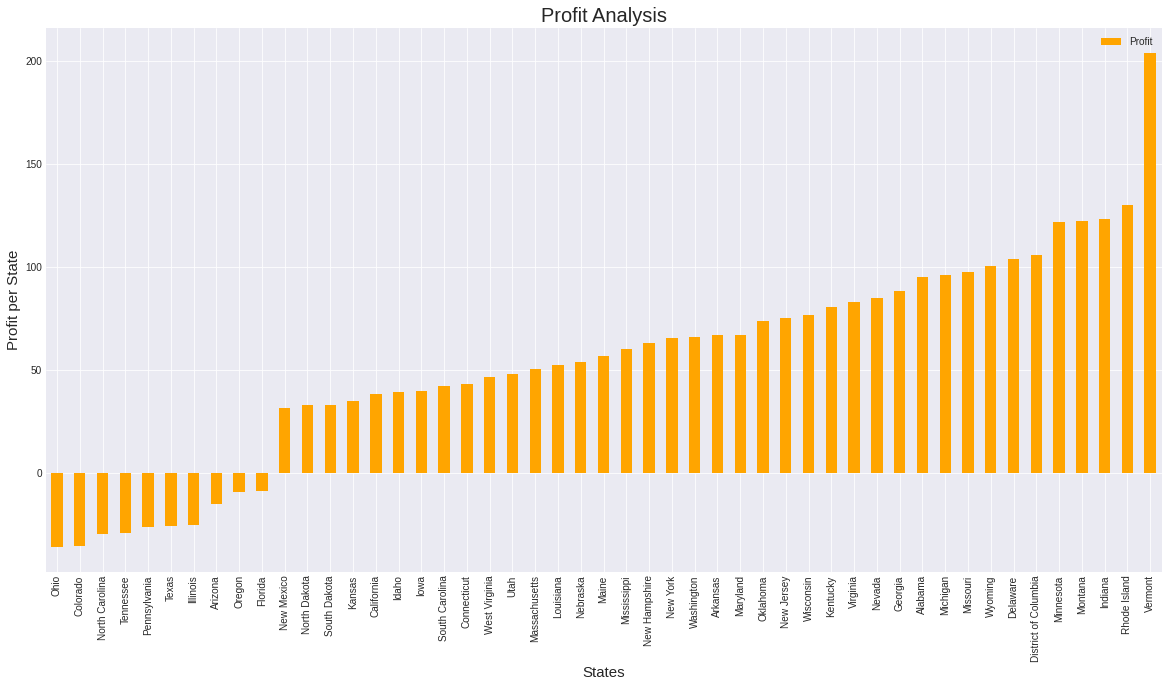

In [18]:
df_state = df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df2 = df_state.sort_values('Profit')
df2[['Profit']].plot(kind = 'bar', figsize = (20,10), color = 'orange')
plt.title('Profit Analysis', fontsize = 20)
plt.ylabel('Profit per State' , size = 15)
plt.xlabel('States' , size = 15)
plt.show()

From this graph, we can say that Vermont has the highest profit and Ohio has the lowest profit.

**Based on sale**

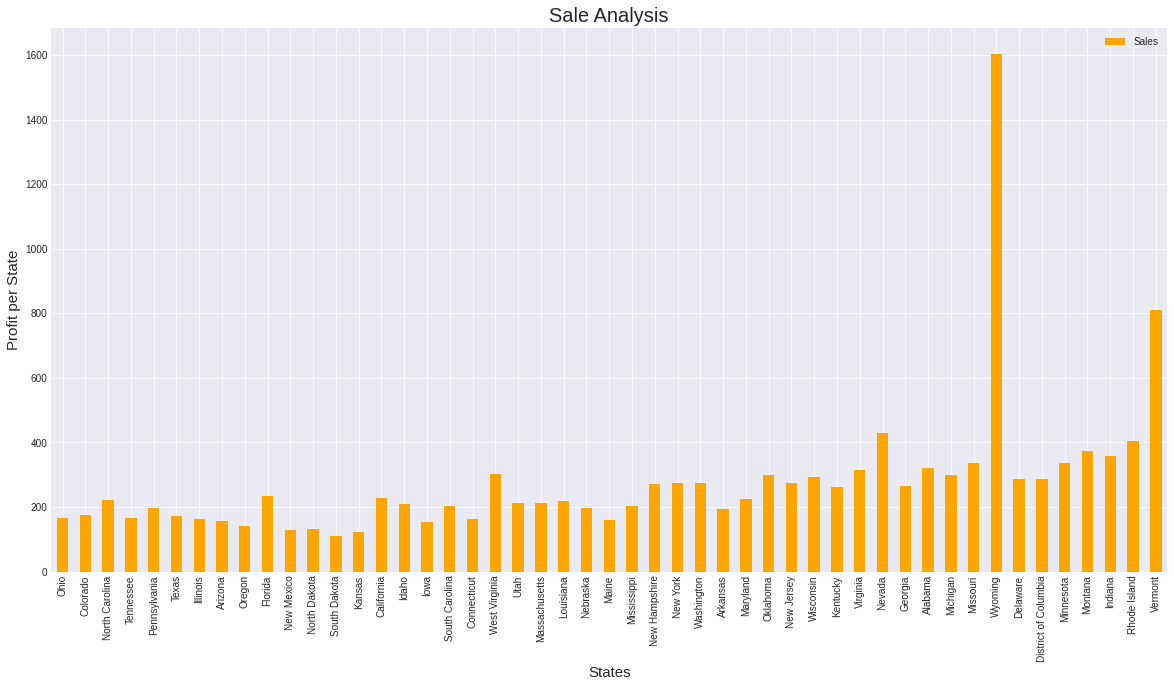

In [19]:
df2[['Sales']].plot(kind = 'bar', figsize = (20,10), color='orange')
plt.title('Sale Analysis', fontsize = 20)
plt.ylabel('Profit per State' , size = 15)
plt.xlabel('States', size = 15)
plt.show()

From the above visuals, the highest amount of sales is observed in Wyoming and the lowest amount of sales is seen in South Dakota

**Based on discount**

Text(0.5, 1.0, 'Discount analysis')

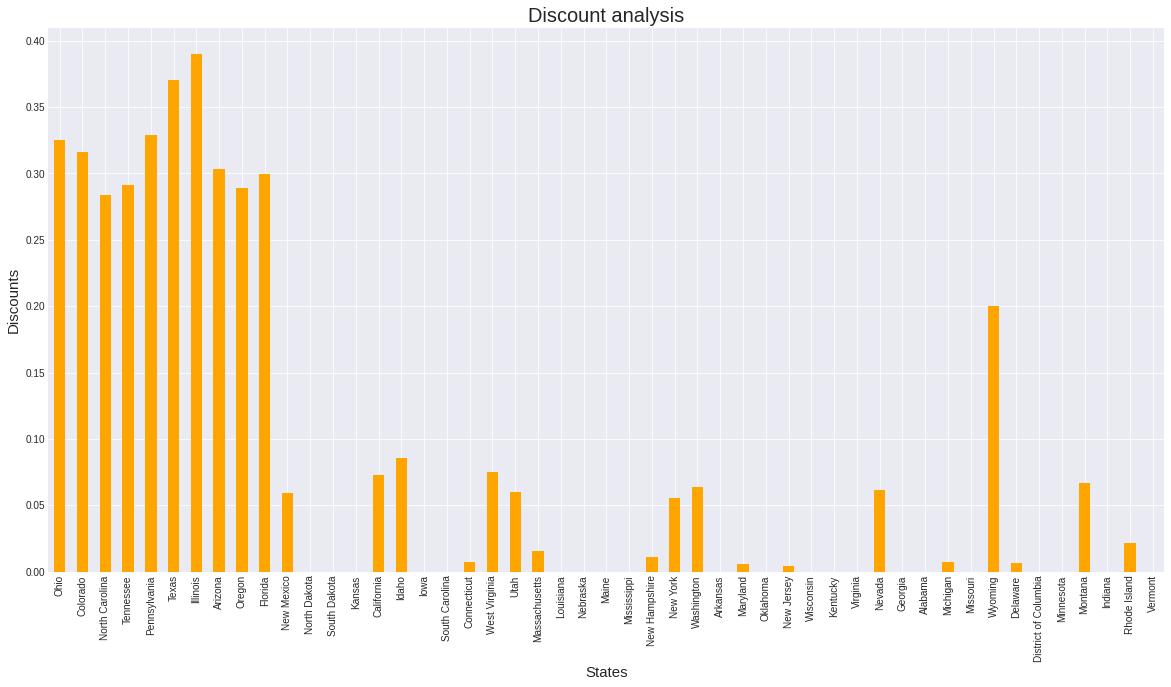

In [20]:
df2['Discount'].plot(kind = 'bar', figsize = (20,10), color = 'orange')
plt.ylabel('Discounts' , size = 15)
plt.xlabel('States', size = 15)
plt.title('Discount analysis', fontsize = 20)

State Illinois has the highest discount. 

# **City wise analysis**
**Based on dealings**

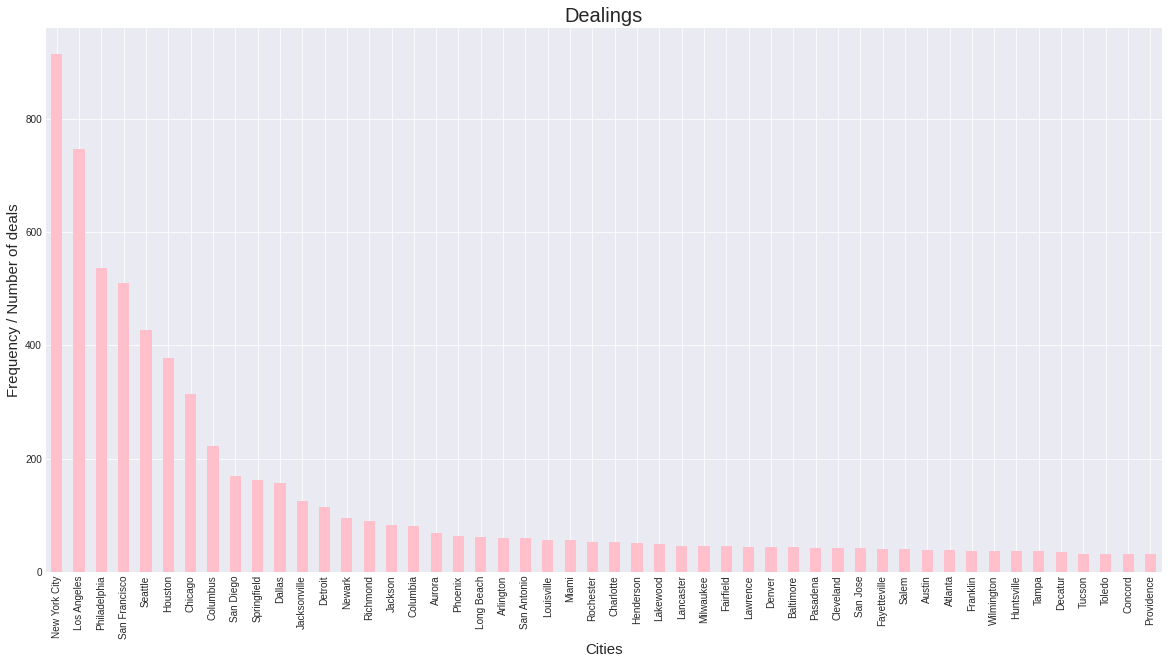

In [21]:
df3 = df['City'].value_counts()
df3=df3.head(50)
df3.plot(kind = 'bar', figsize = (20,10), color = 'pink')
plt.ylabel('Frequency / Number of deals' , size = 15)
plt.xlabel('Cities' , size = 15)
plt.title('Dealings', fontsize = 20)
plt.show()

The highest number of dealings was found in New York City

**Based on profit**

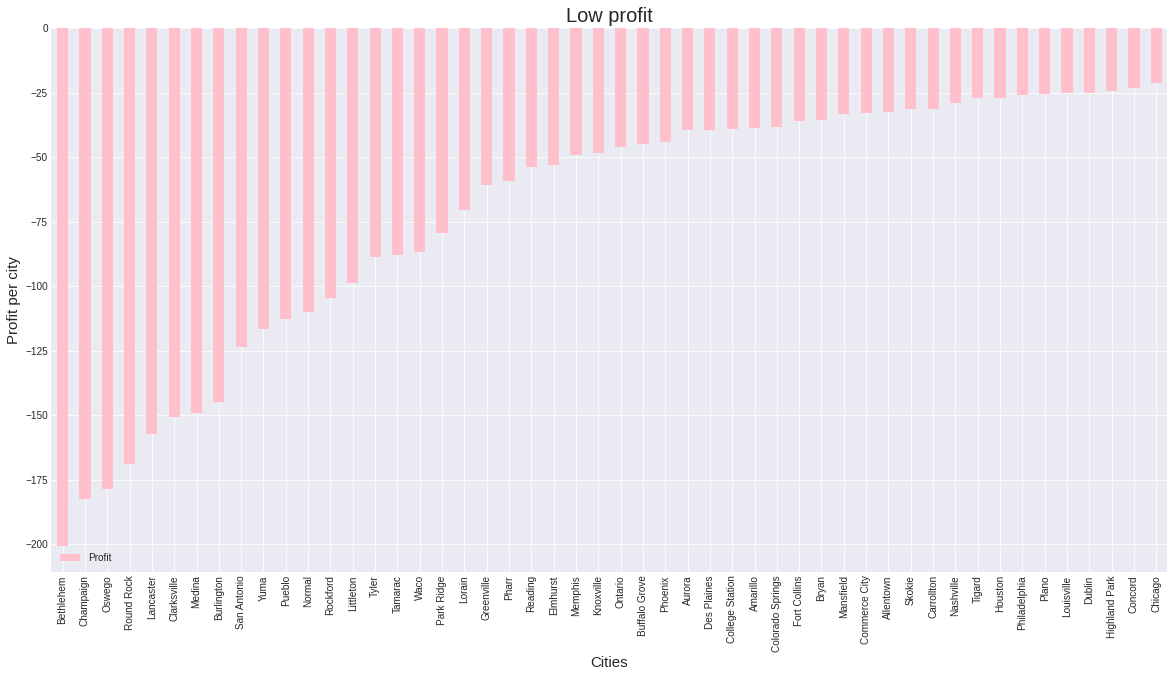

In [22]:
df_city = df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df4 = df_city.sort_values('Profit')
df4[['Profit']].head(50).plot(kind = 'bar', figsize = (20,10), color = 'pink')
plt.title('Low profit', fontsize = 20)
plt.ylabel('Profit per city' , size = 15)
plt.xlabel('Cities' , size = 15)
plt.show()

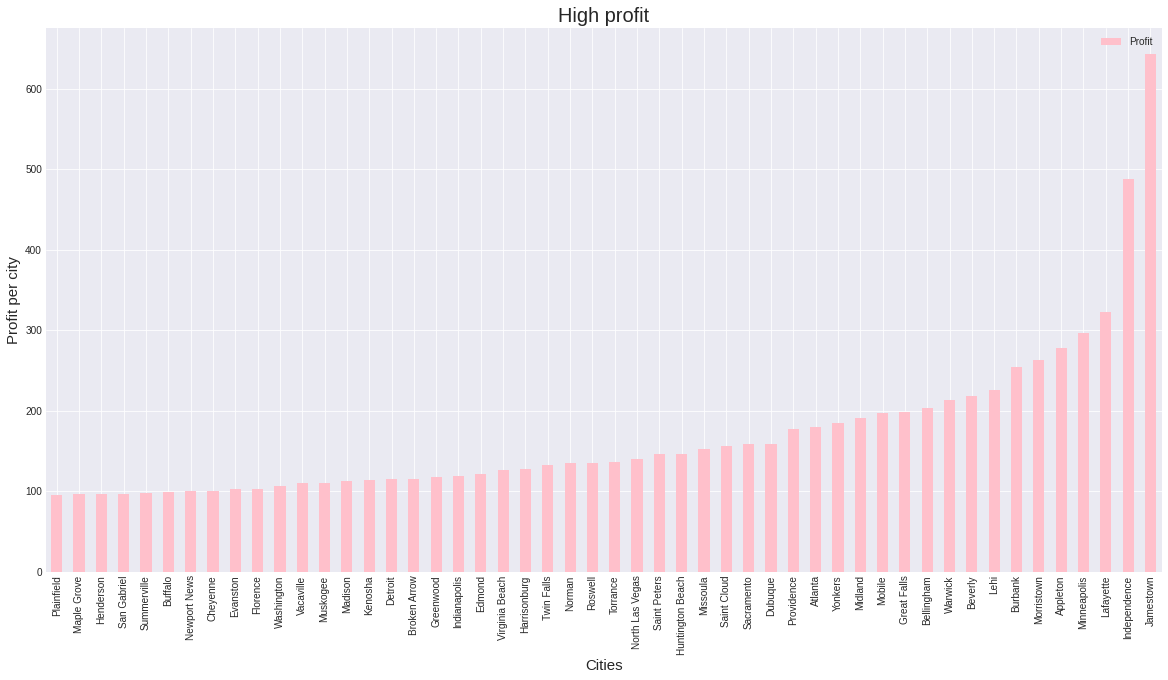

In [23]:
df_city = df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df5 = df_city.sort_values('Profit')
df5[['Profit']].tail(50).plot(kind = 'bar', figsize = (20,10), color = 'pink')
plt.title('High profit', fontsize = 20)
plt.ylabel('Profit per city' , size = 15)
plt.xlabel('Cities' , size = 15)
plt.show()

We can conclude that 50 cities have profit in positive and 50 cities have profit in negative and hence balanced.

**Based on sale**

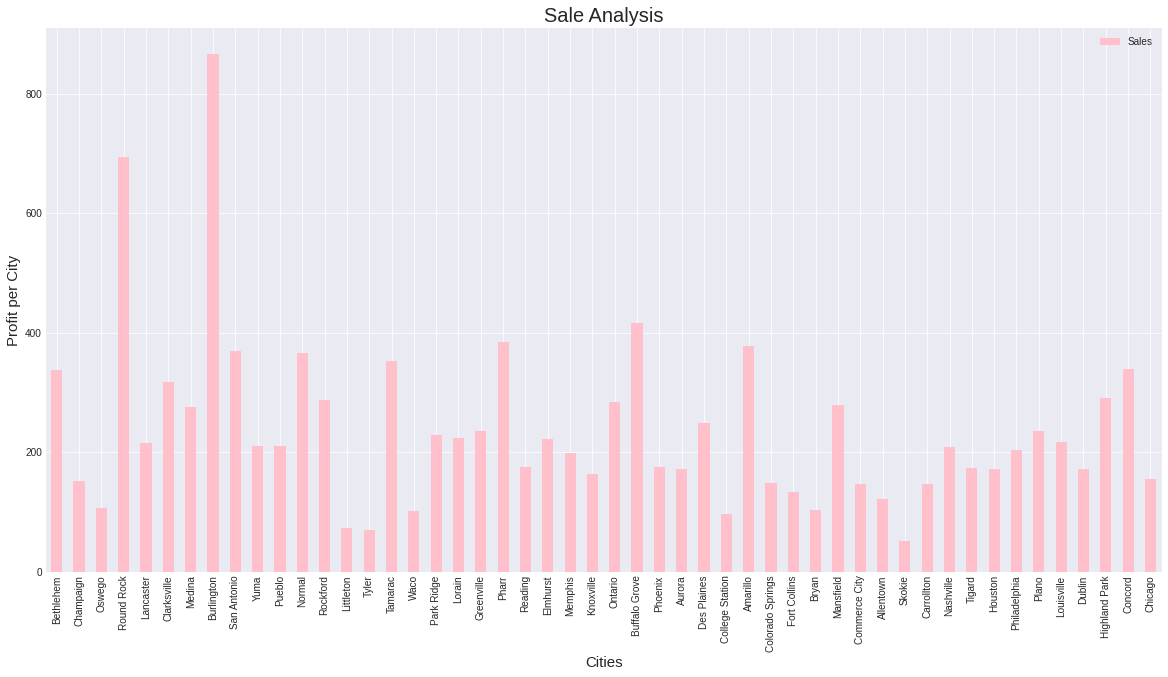

In [24]:
df4[['Sales']].head(50).plot(kind = 'bar', figsize = (20,10), color = 'pink')
plt.title('Sale Analysis', fontsize = 20)
plt.ylabel('Profit per City' , size = 15)
plt.xlabel('Cities', size = 15)
plt.show()

Burlington has the highest number of sales and Skokie has the lowest number of sales

**Based on discount**

Text(0.5, 1.0, 'Discount analysis')

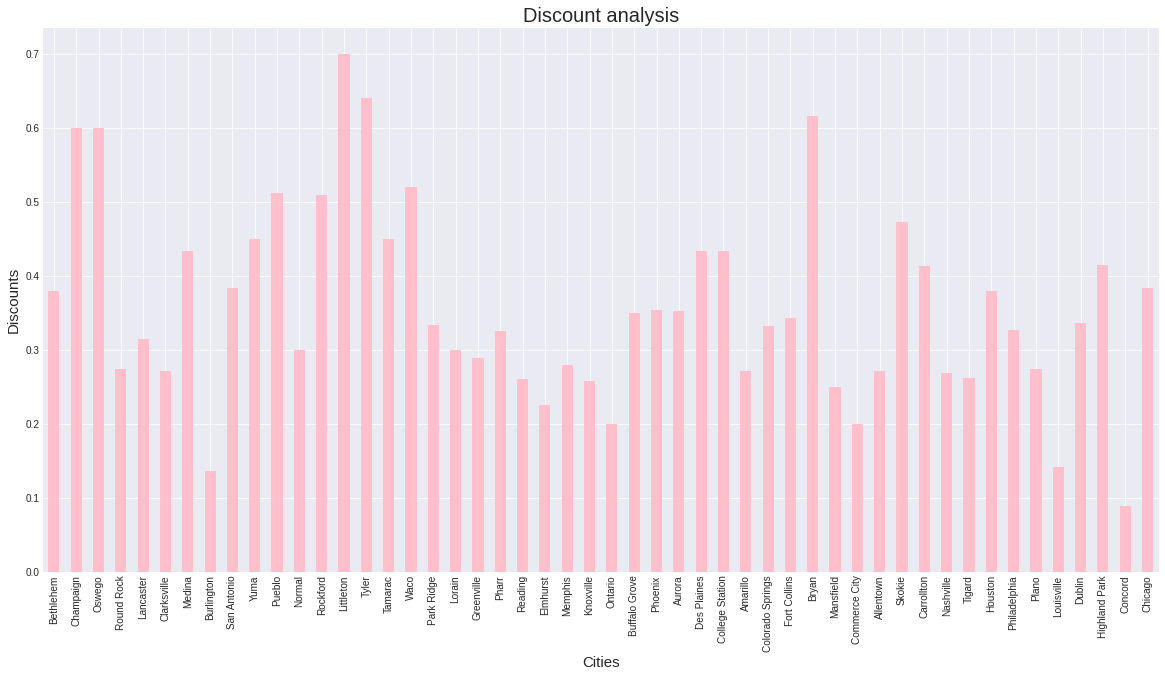

In [25]:
df4['Discount'].head(50).plot(kind = 'bar', figsize = (20,10), color = 'pink')
plt.ylabel('Discounts' , size = 15)
plt.xlabel('Cities', size = 15)
plt.title('Discount analysis', fontsize = 20)

Littleton has the highest discount

# **Quantity wise analysis**

Text(0.5, 1.0, 'Quantity wise analysis of Sale, Discount, Profit')

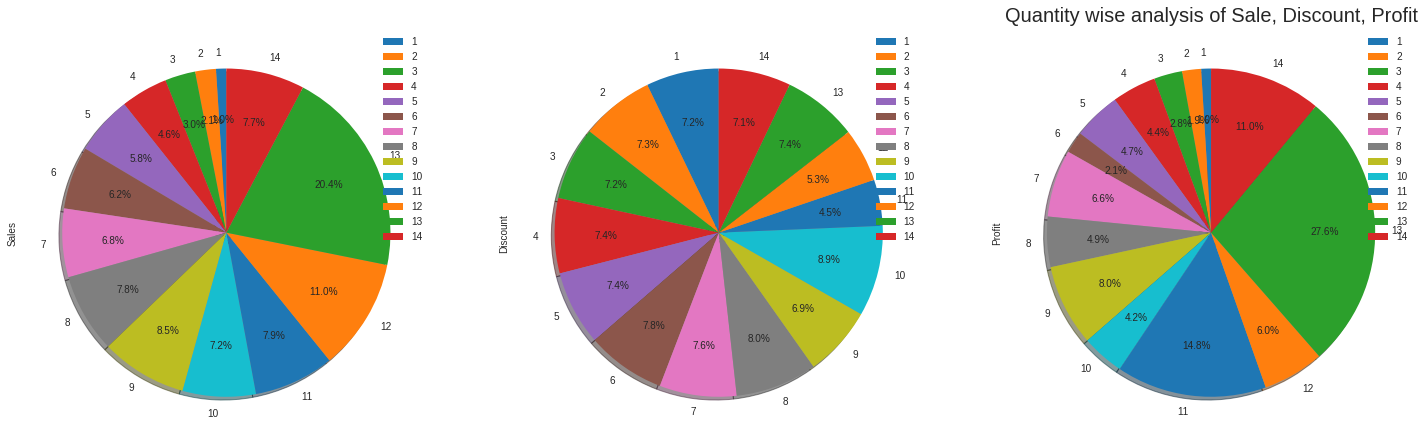

In [26]:
df_quantity = df.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
df_quantity.plot.pie(subplots = True, autopct = '%1.1f%%', figsize = (25, 25), pctdistance = 0.69, startangle = 90, shadow = True, labels = df_quantity.index)
plt.title('Quantity wise analysis of Sale, Discount, Profit' , size = 20)

# **Category wise analysis**

Text(0.5, 1.0, 'Category wise analysis of Sale, Discount, Profit')

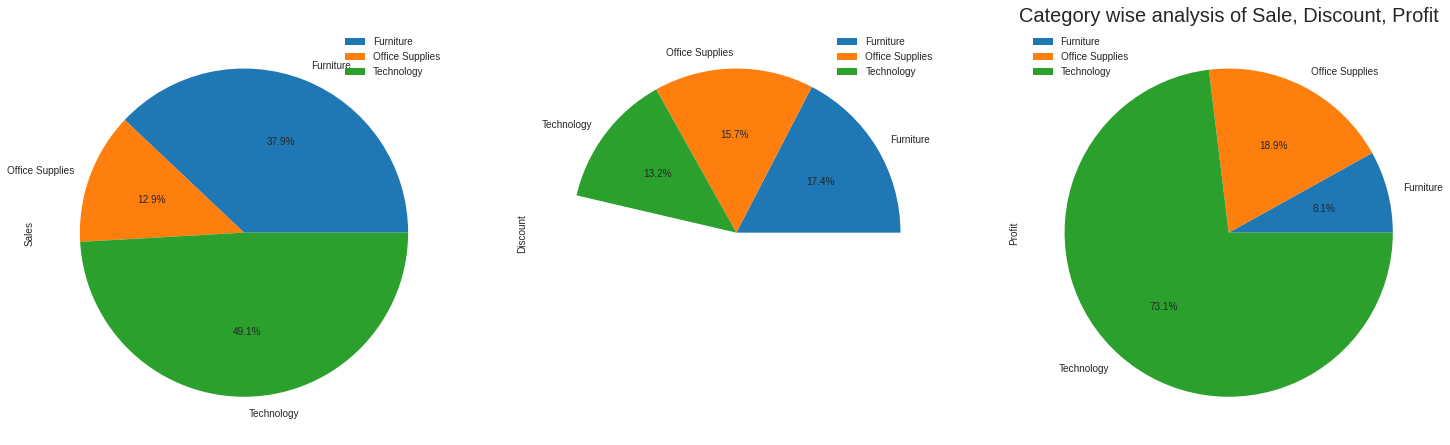

In [27]:
df_category = df.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
df_category.plot.pie(subplots = True, figsize = (25, 25), autopct = '%1.1f%%', labels = df_category.index)
plt.title('Category wise analysis of Sale, Discount, Profit' , size = 20)

# **Region wise analysis**

Text(0.5, 1.0, 'Region wise analysis of Sale, Discount, Profit')

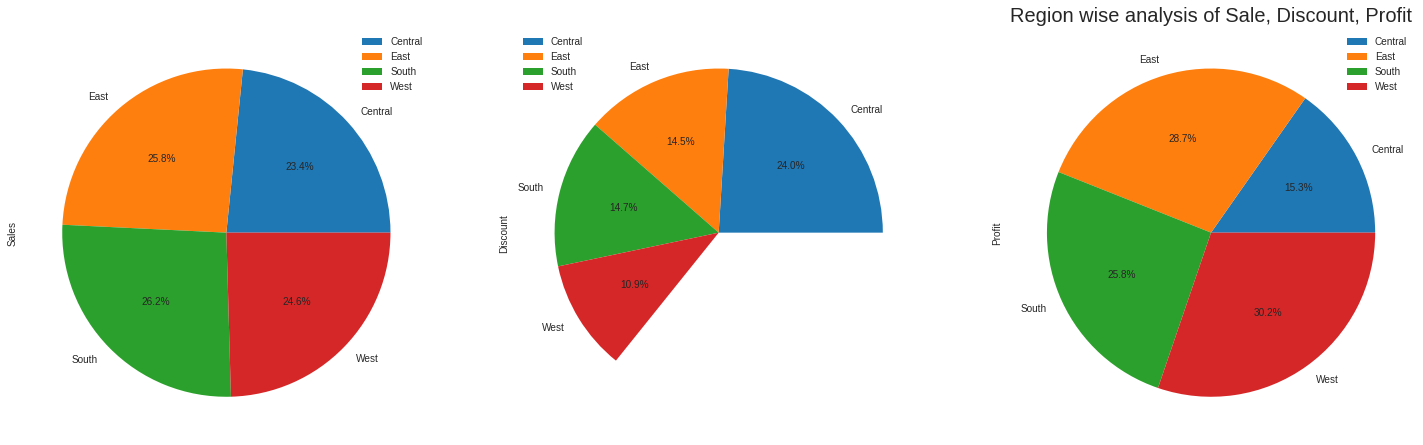

In [28]:
df_region = df.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
df_region.plot.pie(subplots = True, figsize = (25, 25), autopct = '%1.1f%%', labels = df_region.index)
plt.title('Region wise analysis of Sale, Discount, Profit' , size = 20)

# **Ship mode wise analysis**

Text(0.5, 1.0, 'Ship mode wise analysis of Sale, Discount, Profit')

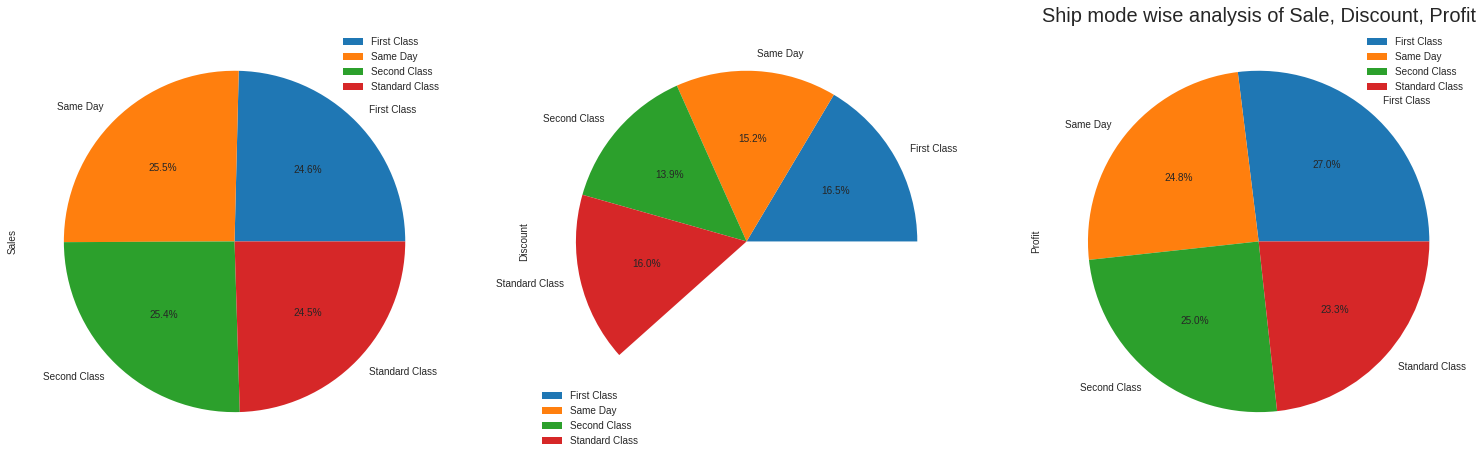

In [29]:
df_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()
df_shipmode.plot.pie(subplots = True, figsize = (26, 26), autopct = '%1.1f%%', labels = df_shipmode.index)
plt.title('Ship mode wise analysis of Sale, Discount, Profit' , size = 20)

# **Interdependency of Sales, Profits and Discounts**

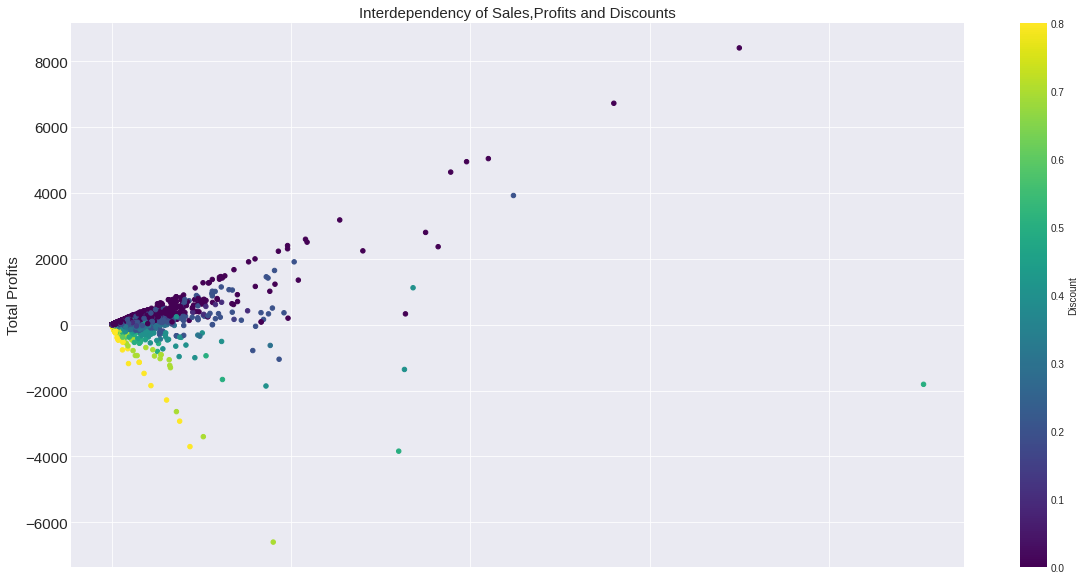

In [30]:
df.plot(kind = "scatter", figsize = (20,10), x = "Sales", y= "Profit", c = "Discount", s = 20, fontsize = 15, colormap = "viridis")
plt.ylabel('Total Profits', fontsize = 15)
plt.title("Interdependency of Sales,Profits and Discounts", fontsize = 15)
plt.show()

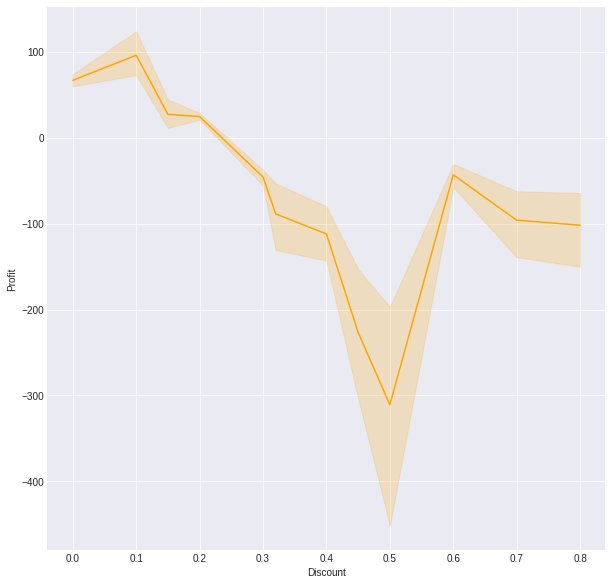

In [31]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Discount', y = 'Profit', color = 'orange', data = df)

# **Conclusion** 

*   Some of the states like North Dakota, Wyoming and West Virginia have little to no sales at all. Hence, as a Busisness Manager I have to be looked in this states.
*   High values of potential customers are found in Texas and New York after California since California has the highest number of sales. Hence Texas and New York can be concentrated upon to generate more profit.
*   High values of potential customers are found in Texas and New York after California since California has the highest number of sales. Hence Texas and New York can be concentrated upon to generate more profit.
*   The sales and profit in southern and central region is less. By providing incentives like discount, both sales and profit will be increased. Also, highest purchases are found in consumer segment. Corporate and home office segments should be concentrated upon to increase the sales and profit.








